In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# Load dataset
df=pd.read_csv('cricket-data.csv',na_values=['-'])
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,NaN,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4.0,525+,23
58,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11.0,1165,24
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1.0,119+,0
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4.0,241+,5+


In [4]:
# data cleaning and preprocessing
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,NaN,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1


In [5]:
df.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
57,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4.0,525+,23
58,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11.0,1165,24
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1.0,119+,0
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4.0,241+,5+
61,DR Jardine (ENG),1928-1934,22,33,6,1296,127,48.00,2110+,25.59,1,10,2.0,53+,0


In [5]:
# Rename cols
df=df.rename(columns={'NO':'Not Out','Mat':'Matches','HS':'Highest_Inns_Score','BF':'Ball_Face','SR':'Batting_Strike_Rate'})
df.head()

,Player,Span,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,NaN,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1


In [6]:
# # Check null values
df.isna().any()

Player                 False
Span                   False
Matches                False
Inns                   False
Not Out                False
Runs                   False
Highest_Inns_Score     False
Ave                    False
Ball_Face               True
Batting_Strike_Rate     True
100                    False
50                     False
0                       True
4s                     False
6s                     False
dtype: bool

In [7]:
df.isna().sum()[df.isna().sum()>0]

Ball_Face              3
Batting_Strike_Rate    3
0                      1
dtype: int64

In [8]:
# Replace NA values with Zero(0)
df['Ball_Face']=df['Ball_Face'].fillna(0)
df['Batting_Strike_Rate']=df['Batting_Strike_Rate'].fillna(0)
df['0']=df['0'].fillna(0)
df.head()

,Player,Span,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1


In [9]:
# Check duplicate values
print(df.duplicated().sum())

0


In [10]:
# split the 'span' coulmn into two columns(start and end date)\
df[['Start_Date','End_Date']]=df['Span'].str.split('-',expand=True)
df.head()

,Player,Span,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s,Start_Date,End_Date
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954


In [7]:
# To cheak data type
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF         object
SR        float64
100         int64
50          int64
0         float64
4s         object
6s         object
dtype: object

In [12]:
# convert datatypes object into int
#df['Starting_Date']=df['Starting_Date'].astype('int')
#df['End_Date']=df['End_Date'].astype('int')

In [13]:
# Rechecking data type
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF         object
SR        float64
100         int64
50          int64
0         float64
4s         object
6s         object
dtype: object

In [15]:
df.drop(columns='Span',inplace=True)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6
1,PHKD Mendis (SL),12,21,2,1184,182*,62.31,1839,64.38,5,4,NaN,123,23
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1


In [11]:
# Remove span column
df.drop(columns='Span',inplace=True)
df.head()

,Player,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s,Start_Date,End_Date
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948
1,PHKD Mendis (SL),12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954


In [14]:
# split up the country from the player column
df[['Player','Country']]=df['Player'].str.split('(',expand=True)

In [15]:
df['Country']=df['Country'].str.replace(')',"")
df.head()

,Player,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s,Start_Date,End_Date,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948,AUS
1,PHKD Mendis,12,21,2,1184,182*,62.31,1839,64.38,5,4,0.0,123,23,2022,2025,SL
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2.0,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954,WI


In [16]:
df['Highest_Inns_Score'].unique()

array(['334', '182*', '269*', '274', '270*', '194', '243', '256', '207',
       '317', '336*', '365*', '319', '211', '239', '220', '364', '224',
       '122', '251', '183', '227', '247*', '231', '248*', '400*', '214*',
       '280*', '270', '223', '313', '257', '201*', '232*', '195', '203*',
       '236*', '200', '262', '380', '278*', '205', '208*', '291', '278',
       '374', '329', '261', '215*', '329*', '144*', '189*', '250', '277',
       '266', '232', '127'], dtype=object)

In [17]:
df['Highest_Inns_Score']=df['Highest_Inns_Score'].str.replace("*", "")
df.head()

,Player,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s,Start_Date,End_Date,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7.0,626+,6,1928,1948,AUS
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0.0,123,23,2022,2025,SL
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2.0,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1.0,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270,60.83,416+,56.00,10,5,2.0,104+,1,1930,1954,WI


In [18]:
df['Ball_Face'].unique()

array(['9800+', '1839', '2667', '1707+', '416+', '6558+', '1288+',
       '4957+', 0, '2581', '7491+', '4063+', '22882', '5363+', '19176',
       '2844+', '28903', '178+', '17913', '665+', '1823', '13079+',
       '108+', '29437+', '19753', '2738', '15164+', '31258', '14372',
       '19375', '22782', '2035+', '10636', '12436', '27395', '14184+',
       '22461', '22568', '14349', '16077', '27002+', '3345', '9613+',
       '2731+', '22959', '16345', '488+', '619+', '10441', '2445',
       '15456', '885+', '158+', '11641', '1799+', '8662+', '15525',
       '3118+', '3217+', '2110+'], dtype=object)

In [19]:
df['Ball_Face']=df['Ball_Face'].str.replace('+',"")
df['6s']=df['6s'].str.replace('+',"")
df['4s']=df['4s'].str.replace('+',"")

In [20]:
df.head()

,Player,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s,Start_Date,End_Date,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7.0,626,6,1928,1948,AUS
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0.0,123,23,2022,2025,SL
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2.0,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1.0,246,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2.0,104,1,1930,1954,WI


In [21]:
df['Carrier length']=df['End_Date']-df['Start_Date']
df.head()

,Player,Matches,Inns,Not Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Batting_Strike_Rate,100,50,0,4s,6s,Start_Date,End_Date,Country,Carrier length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7.0,626,6,1928,1948,AUS,20
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,0.0,123,23,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2.0,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1.0,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2.0,104,1,1930,1954,WI,24


In [22]:
df['Carrier length'].unique()

array([20,  3,  1,  7, 24, 11,  8, 13, 10,  2, 15, 22, 12, 18, 14,  5, 16,
       17,  9, 21, 19,  6])

In [23]:
#9 oct 
# Calculation on DataFrame
# 1. Find the avg carrier length of cricketers.
avg=df['Carrier length'].mean()
avg

np.float64(12.96774193548387)

In [24]:
# Find the average batting strike rate for cricketers who played over 10 years
df_averageBattingStrike=df[df['Batting_Strike_Rate']>10]['Batting_Strike_Rate'].mean()
print(f"Average Batting Strike Rate of Cricketers who played over 10 years:\033[1m{df_averageBattingStrike:,.2f} Years. \033)[0m")

Average Batting Strike Rate of Cricketers who played over 10 years:50.17 Years. )


In [25]:
# find the number of cricketers who played before 1960
df_Playercount=df[df['Start_Date']<1960]['Player'].count()
print(f"Number of cricketers who played before 1960: \033[1m{df_Playercount}\033[0m")

Number of cricketers who played before 1960: 23


In [26]:
# Find max highest inns score by country
df.groupby('Country')['Highest_Inns_Score'].max().to_frame().sort_values('Highest_Inns_Score',ascending=False)

,Highest_Inns_Score
Country,
ICC/WI,400
AUS,380
SL,374
WI,365
ENG,364
ICC/PAK,329
ICC/IND,319
PAK,313
SA,278


In [27]:
# Hundreds . fifties, Ducks (0) AVG by Country
df.groupby('Country')[['0','50','100']].mean()

,0,50,100
Country,,,
AUS,8.933333,28.933333,21.533333
ENG,4.461538,21.384615,13.076923
ICC/IND,12.000000,47.500000,29.500000
ICC/PAK,15.000000,46.000000,25.000000
ICC/SA,13.500000,48.000000,36.000000
ICC/WI,17.000000,48.000000,34.000000
IND,8.000000,31.500000,23.250000
NZ,11.000000,37.000000,33.000000
PAK,8.000000,24.200000,17.800000


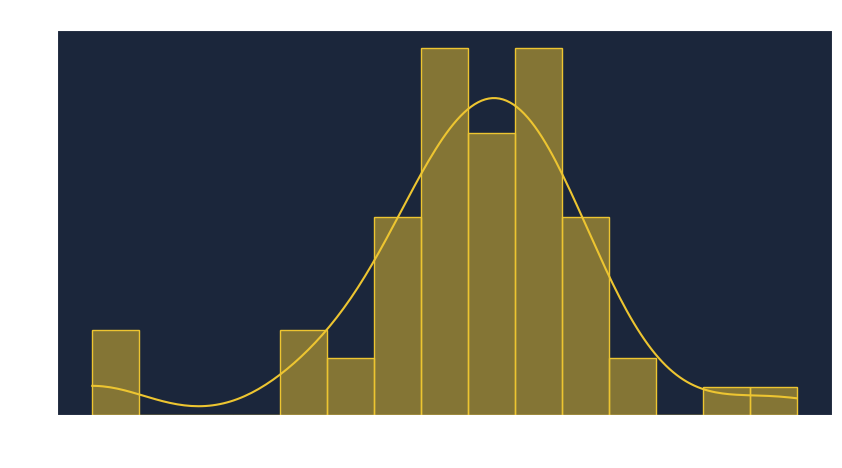

In [28]:
# Distribution of Batting Strike Rate
plt.figure(figsize=(10,5),dpi=100)
plt.rcParams.update(
{
'figure.facecolor':'#1b263b',
'axes.facecolor':'#1b263b',
'axes.edgecolor':'white',
'axes.labelcolor':'white',
'xtick.color':'white',
'ytick.color':'white',
'text.color':'white',
'axes.titleweight':'bold',
'axes.labelweight':'bold'
})
sns.histplot(data=df,x='Batting_Strike_Rate',bins=15,edgecolor='#edc531',color='#edc531',kde=True)
plt.title("Distribution of Batting Strike Rate")
plt.show()

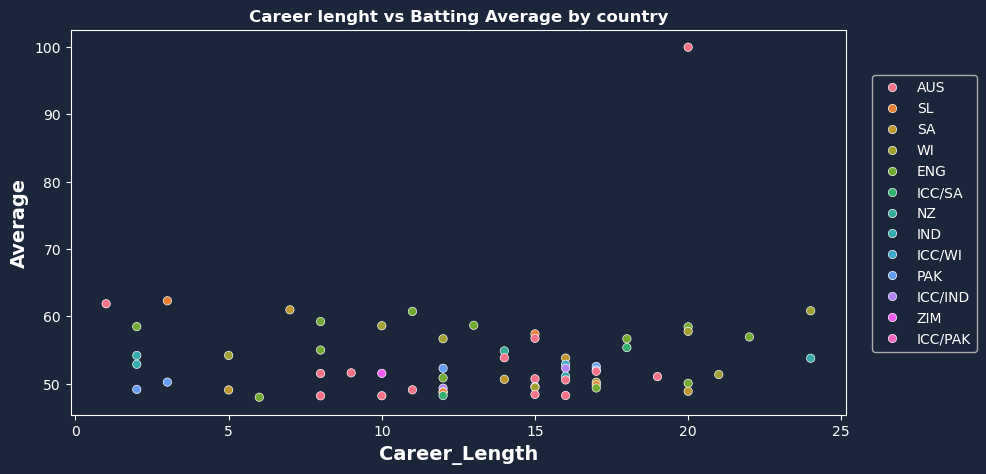

In [29]:
# Career lenght vs Batting Average by country 
plt.figure(figsize=(10,5),dpi=100)
plt.rcParams.update(
{
'figure.facecolor':'#1b263b',
'axes.facecolor':'#1b263b',
'axes.edgecolor':'white',
'axes.labelcolor':'white',
'xtick.color':'white',
'ytick.color':'white',
'text.color':'white',
'axes.titleweight':'bold',
'axes.labelweight':'bold'
})
sns.scatterplot(data=df,x='Carrier length',y='Ave',hue='Country')
plt.title("Career lenght vs Batting Average by country")
plt.ylabel("Average",fontsize='14',weight='bold')
plt.xlabel("Career_Length",fontsize='14',weight='bold')
plt.legend(bbox_to_anchor=(1.025, 0.9),loc='upper left');

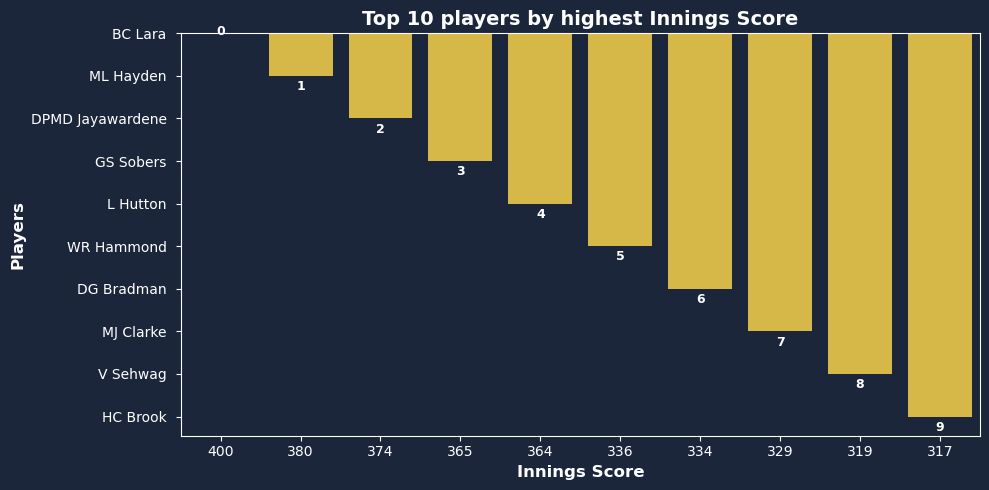

In [30]:
# Top 10 players by highest Innings Score
topplayer=df.groupby('Highest_Inns_Score')['Player'].max().to_frame().sort_values('Highest_Inns_Score',ascending= False).head(10)
plt.figure(figsize=(10,5),dpi=100)
plt.rcParams.update(
{
'figure.facecolor':'#1b263b',
'axes.facecolor':'#1b263b',
'axes.edgecolor':'white',
'axes.labelcolor':'white',
'xtick.color':'white',
'ytick.color':'white',
'text.color':'white',
'axes.titleweight':'bold',
'axes.labelweight':'bold'
})
ax = sns.barplot(data = topplayer, x = 'Highest_Inns_Score', y='Player',color= '#edc531')

for bar in ax.containers:
    ax.bar_label(bar, padding=3, weight='bold',fontsize=9)

plt.title('Top 10 players by highest Innings Score', fontsize=14,weight='bold')
plt.ylabel('Players', fontsize=12 ,weight ='bold')
plt.xlabel('Innings Score',fontsize=12, weight='bold')

plt.tight_layout();

In [31]:
# Number of hundres, fifties, Ducks by country 
number=df.groupby('Country')[['0','50','100']].mean().reset_index()

Text(0, 0.5, 'Career Length')

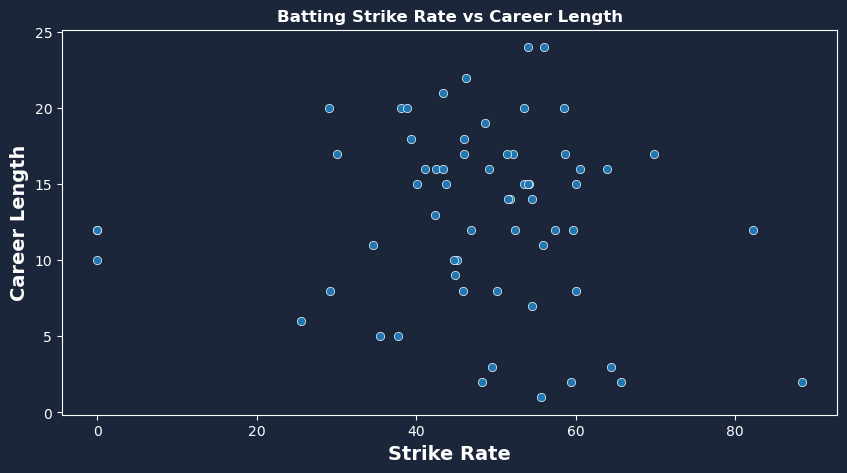

In [32]:
# Batting Strike Rate vs Career Length
plt.figure(figsize=(10,5),dpi=100)
plt.rcParams.update(
{
'figure.facecolor':'#1b263b',
'axes.facecolor':'#1b263b',
'axes.edgecolor':'white',
'axes.labelcolor':'white',
'xtick.color':'white',
'ytick.color':'white',
'text.color':'white',
'axes.titleweight':'bold',
'axes.labelweight':'bold'
})
sns.scatterplot(data=df,x='Batting_Strike_Rate',y='Carrier length')
plt.title("Batting Strike Rate vs Career Length")
plt.xlabel("Strike Rate",fontsize='14',weight='bold')
plt.ylabel("Career Length",fontsize='14',weight='bold')


Text(0, 0.5, 'Highest Innings Score')

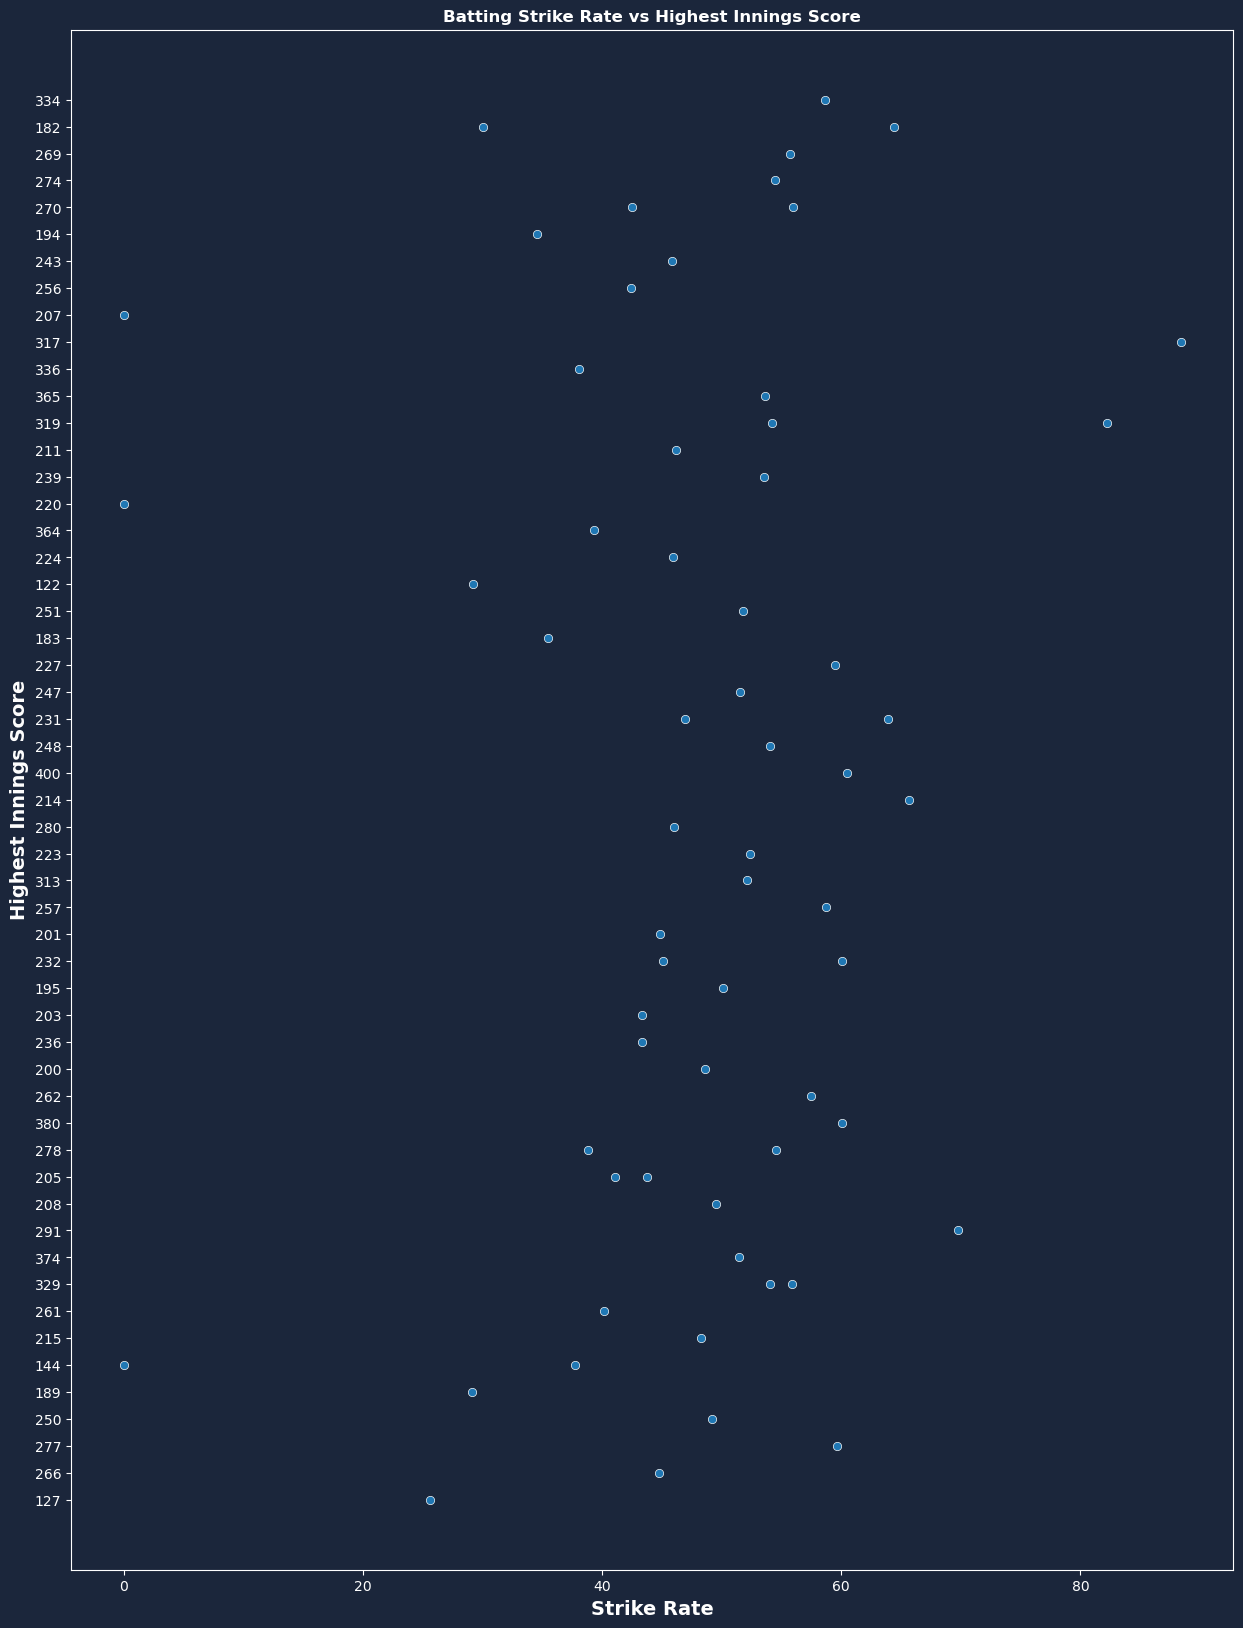

In [33]:
# Batting Strike Rate vs Highest Innings Score
plt.figure(figsize=(15,20),dpi=100)
plt.rcParams.update(
{
'figure.facecolor':'#1b263b',
'axes.facecolor':'#1b263b',
'axes.edgecolor':'white',
'axes.labelcolor':'white',
'xtick.color':'white',
'ytick.color':'white',
'text.color':'white',
'axes.titleweight':'bold',
'axes.labelweight':'bold'
})
sns.scatterplot(data=df,x='Batting_Strike_Rate',y='Highest_Inns_Score')
plt.title("Batting Strike Rate vs Highest Innings Score")
plt.xlabel("Strike Rate",fontsize='14',weight='bold')
plt.ylabel("Highest Innings Score",fontsize='14',weight='bold')

In [ ]:
# Cricketers With The Most Hundreds, Fifties and Ducks

Text(0, 0.5, 'Carrier length')

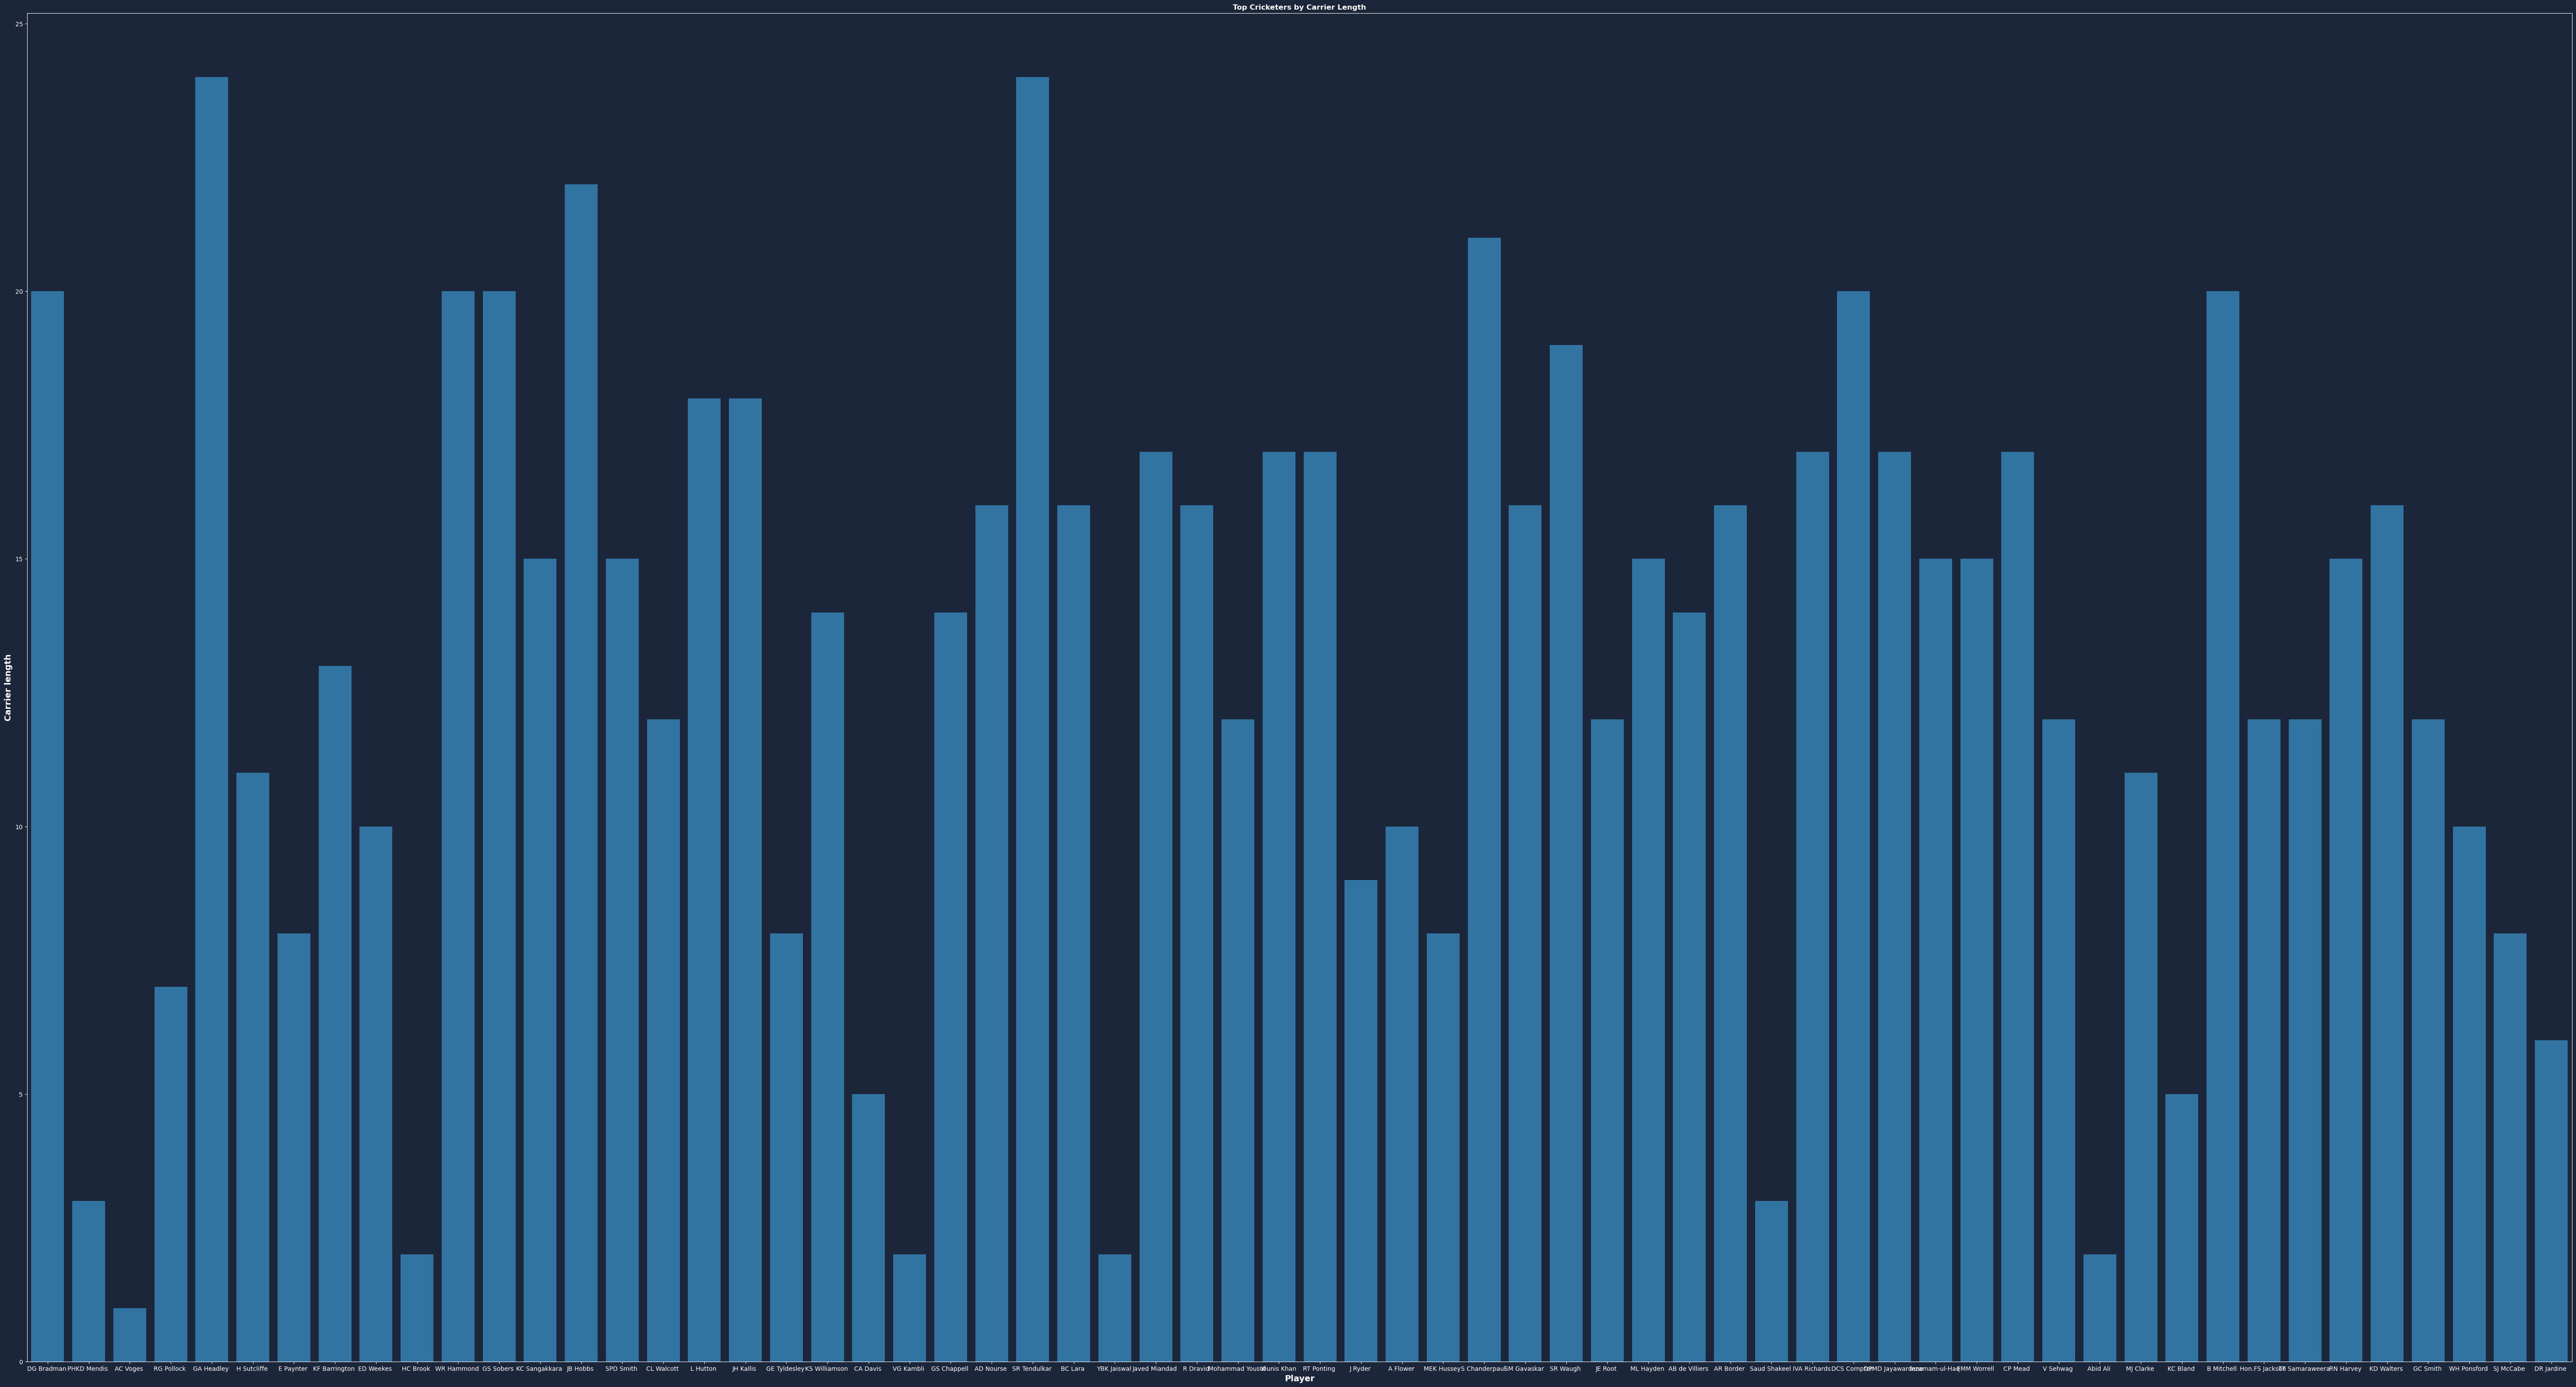

In [57]:
# Top Cricketers by Carrier Length
topplayer=df.groupby('Player')['Carrier length'].max().to_frame().sort_values('Player',ascending= False).head(10)
plt.figure(figsize=(75,40),dpi=100)
plt.rcParams.update(
{
'figure.facecolor':'#1b263b',
'axes.facecolor':'#1b263b',
'axes.edgecolor':'white',
'axes.labelcolor':'white',
'xtick.color':'white',
'ytick.color':'white',
'text.color':'white',
'axes.titleweight':'bold',
'axes.labelweight':'bold'
})
sns.barplot(data=df,x='Player',y='Carrier length')
plt.title("Top Cricketers by Carrier Length")
plt.xlabel("Player",fontsize='14',weight='bold')
plt.ylabel("Carrier length",fontsize='14',weight='bold')

Text(0, 0.5, 'Highest Innings Score')

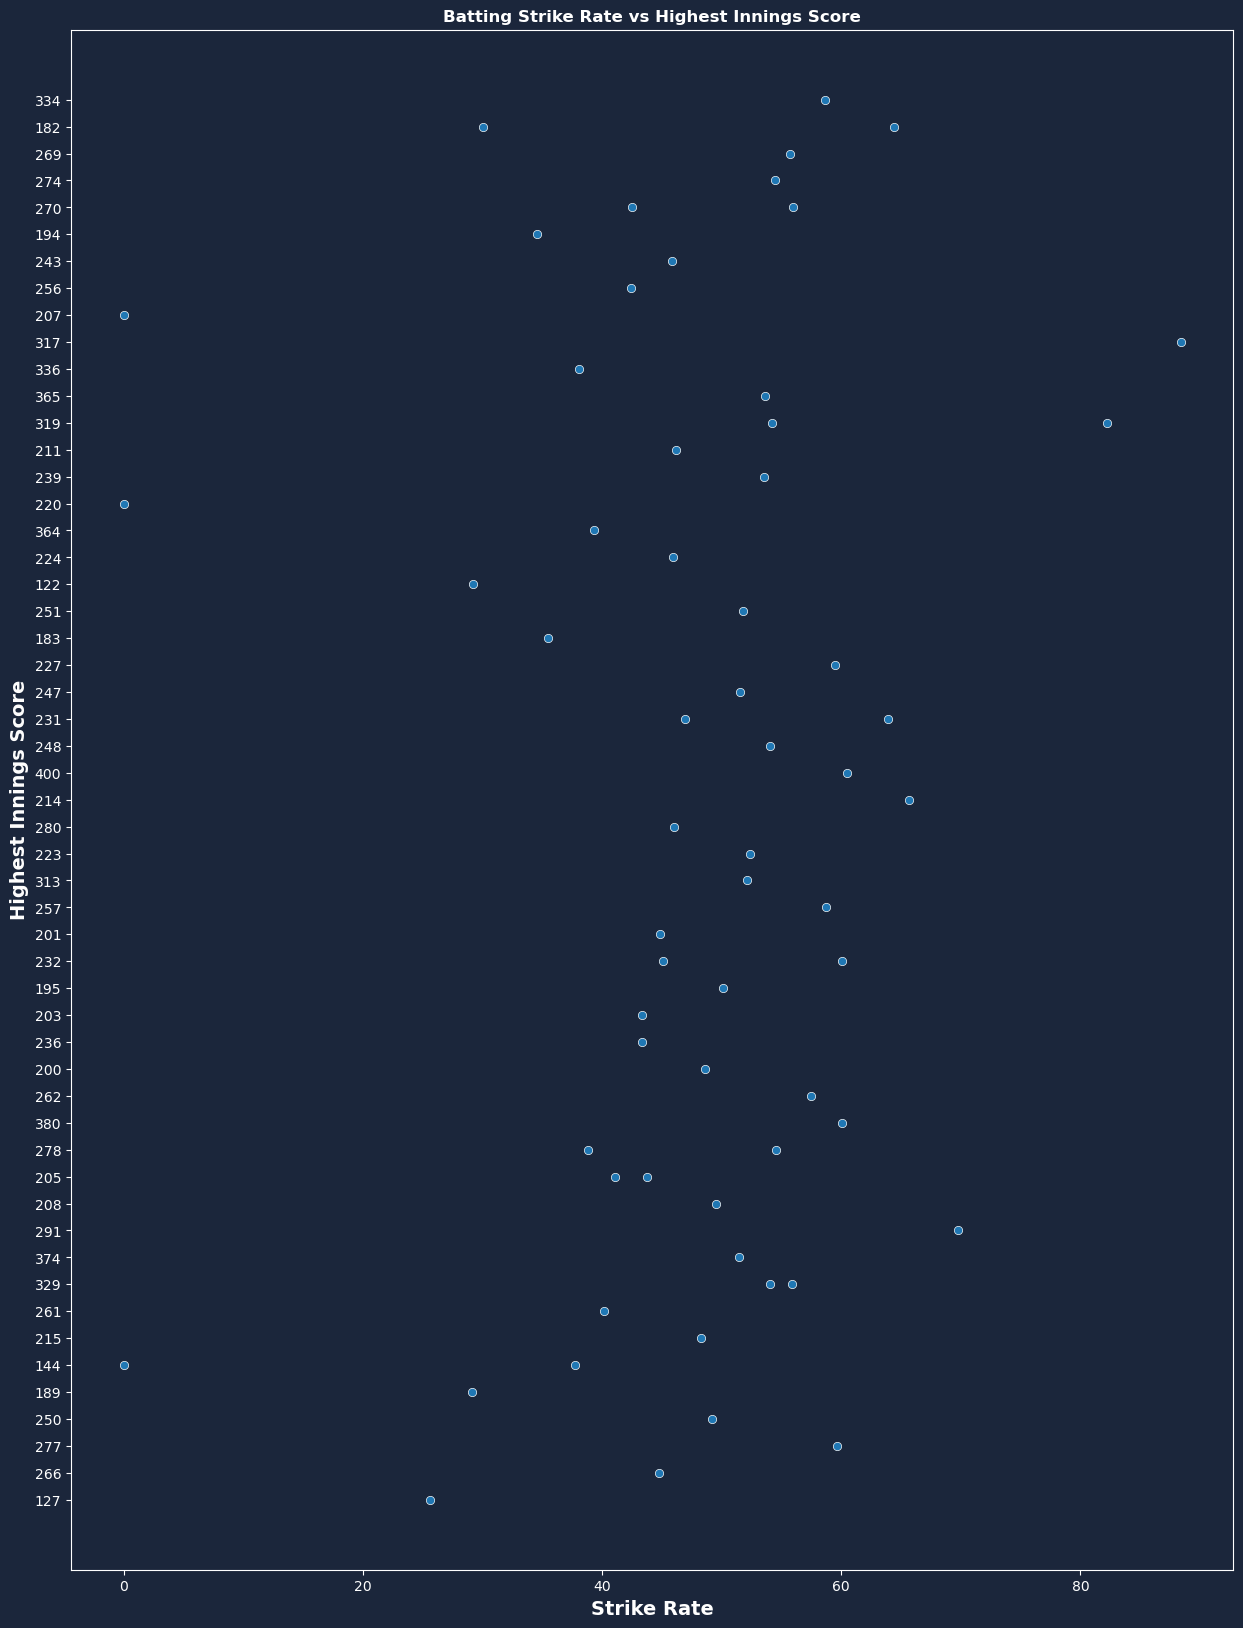

In [62]:
#cricketers by start date (carrier start date)
criketers=df.sort_values('Start_Date')
plt.figure(figsize=(15,20),dpi=100)
plt.rcParams.update(
{
'figure.facecolor':'#1b263b',
'axes.facecolor':'#1b263b',
'axes.edgecolor':'white',
'axes.labelcolor':'white',
'xtick.color':'white',
'ytick.color':'white',
'text.color':'white',
'axes.titleweight':'bold',
'axes.labelweight':'bold'
})
sns.scatterplot(data=df,x='Batting_Strike_Rate',y='Highest_Inns_Score')
plt.title("Batting Strike Rate vs Highest Innings Score")
plt.xlabel("Strike Rate",fontsize='14',weight='bold')
plt.ylabel("Highest Innings Score",fontsize='14',weight='bold')